In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
#Categories that we wnat to classify
categories = [
        'rec.sport.baseball', 'rec.sport.hockey',  # Sports
        'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc' # Politics
    ]
data = fetch_20newsgroups(subset = 'all',categories=categories,remove=('headers','footers','quotes'),shuffle=True,random_state=42)
print(data)

{'data': ["\n\nWell over 100,000 in Lebanon alone.\n1,000,000 - 2,000,000 in the Iran/Iraq conflict, even if Iranians\naren't Arabs, strictly speaking.  (They seem to hate the Zionists at\nleast as much as anyone else in the neighborhood.  Is there some\ncorrelation perhaps between hating Israel and killing off your own\npeople?)\n", '\nWell they could unseal the original warrent (Why was i sealed in the\nfirst place?), release their video & tapes (from their listening devices\ninside the compound) and quit makeing contradictory statements.\n\nDo you believe their statement that the children were killed by\nlethal injection?  They later stated that the childrens bodies\nwere burned to the point the would be hard to identify.  So\nhow did they come up with the lethal injection theory?\n\n\nUnless the evidence was destroyed or other evidence planted.\n\n\nYou mean "Magic bullet" Spector?\n\nI know, a lone gunman killed all the Branch Davidians.   :-) || :-(\n', "Come on Boston, where the

In [3]:
label = []
for t in data.target:
  if data.target_names[t] in ['rec.sport.baseball', 'rec.sport.hockey']:
    label.append(1) #sports
  else:
    label.append(0) #politics

In [4]:
print(f"Number of documents: {len(data.data)}")
print(f"class distribution :{np.bincount(np.array(label))}(0 Politics ,1 Sports)")

Number of documents: 4618
class distribution :[2625 1993](0 Politics ,1 Sports)


In [5]:
X_train,X_test,y_train,y_test = train_test_split(data.data,label,test_size=0.2,random_state=42)

In [6]:
print(len(X_train))

3694


In [7]:
print(X_train[0])


Dayley's salary was guarenteed...with Wells the Jays were only on the
hook for 25%(?) of it.

Give Jackson a break...he lost about 10 pounds with that flu he had
when he was traded.


I would rather have Molitor than Winfield...Winfield was just hogging
all the credit, and he was trying to soak the Jays for a 3 year
guarenteed contract...


The Jays pitching can only get better...Molitor and Alomar haven't hit
anything yet...and the Jays are still over .500...


In [24]:
results = {}

Naive Bayes

Accuracy : 0.9578

 Classification Report

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       549
           1       0.98      0.91      0.95       375

    accuracy                           0.96       924
   macro avg       0.96      0.95      0.96       924
weighted avg       0.96      0.96      0.96       924



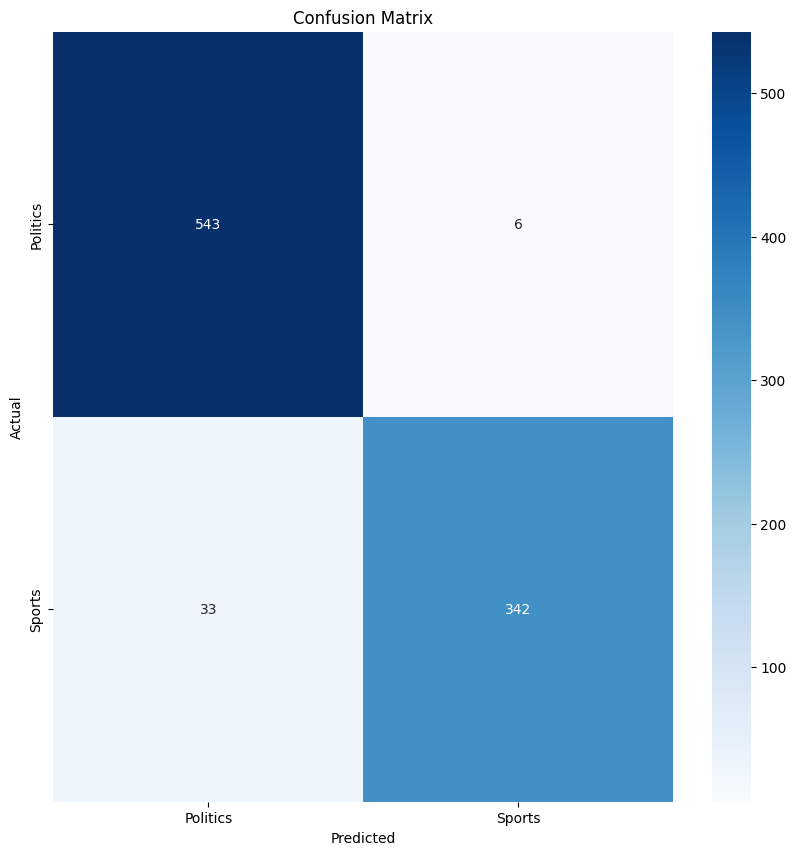

In [25]:
model1 = MultinomialNB()
vectorizer = TfidfVectorizer(stop_words='english',max_features=5000)
pipeline = Pipeline([
    ('tfidf',vectorizer),
    ('clf',model1),
])
#Train
pipeline.fit(X_train,y_train)
#Test
y_pred = pipeline.predict(X_test)
acc1 = accuracy_score(y_test,y_pred)
print(f"Accuracy : {acc1:.4f}")
print(f"\n Classification Report\n")
print(classification_report(y_test,y_pred))

#Plot
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt = 'd',cmap = 'Blues',
            xticklabels = ['Politics','Sports'],
            yticklabels = ['Politics','Sports'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# results['Naive Bayes'] = acc1

## Logistic Regression Model

Accuracy : 0.9535

 Classification Report

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       549
           1       0.99      0.90      0.94       375

    accuracy                           0.95       924
   macro avg       0.96      0.94      0.95       924
weighted avg       0.96      0.95      0.95       924



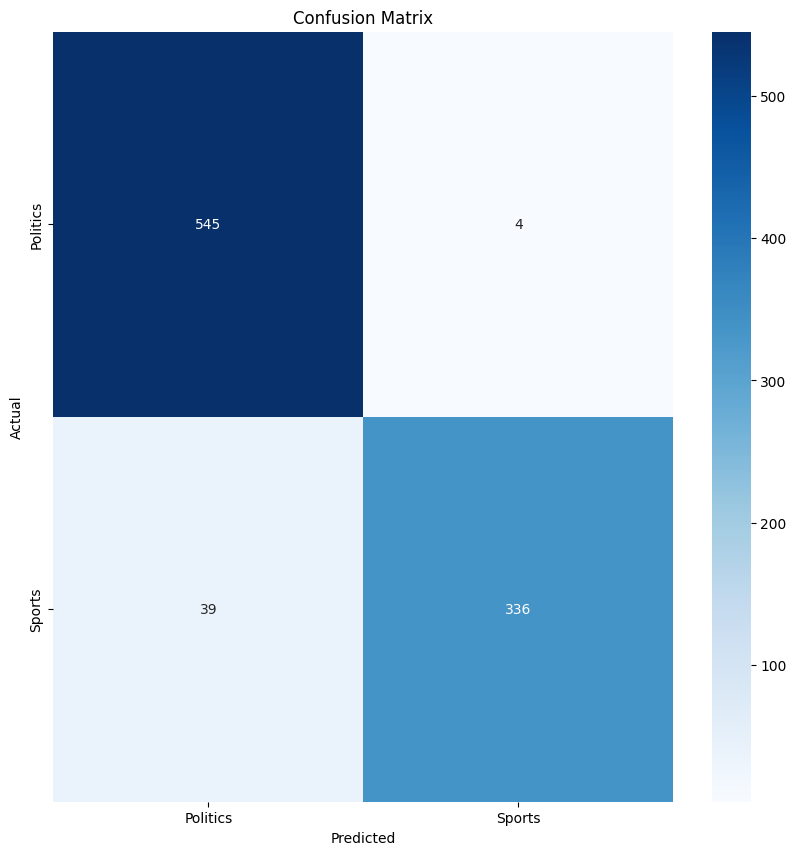

In [26]:
model2 = LogisticRegression(max_iter=1000)
vectorizer = TfidfVectorizer(stop_words='english',max_features=5000)
pipeline = Pipeline([
    ('tfidf',vectorizer),
    ('clf',model2),
])
#Train
pipeline.fit(X_train,y_train)
#Test
y_pred = pipeline.predict(X_test)
acc2 = accuracy_score(y_test,y_pred)
print(f"Accuracy : {acc2:.4f}")
print(f"\n Classification Report\n")
print(classification_report(y_test,y_pred))

#Plot
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt = 'd',cmap = 'Blues',
            xticklabels = ['Politics','Sports'],
            yticklabels = ['Politics','Sports'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# results['Logistic Regression'] = acc2

SVC Model

Accuracy : 0.9470

 Classification Report

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       549
           1       0.95      0.91      0.93       375

    accuracy                           0.95       924
   macro avg       0.95      0.94      0.94       924
weighted avg       0.95      0.95      0.95       924



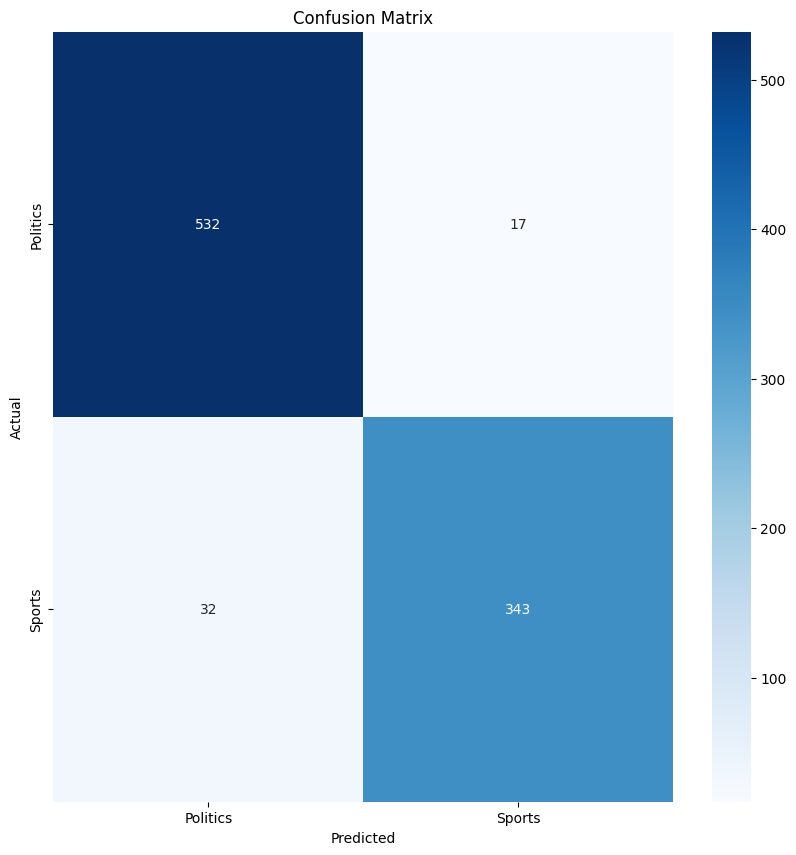

In [27]:
model3 = LinearSVC(random_state=42,dual='auto')
vectorizer = TfidfVectorizer(stop_words='english',max_features=5000)
pipeline = Pipeline([
    ('tfidf',vectorizer),
    ('clf',model3),
])
#Train
pipeline.fit(X_train,y_train)
#Test
y_pred = pipeline.predict(X_test)
acc3 = accuracy_score(y_test,y_pred)
print(f"Accuracy : {acc3:.4f}")
print(f"\n Classification Report\n")
print(classification_report(y_test,y_pred))

#Plot
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt = 'd',cmap = 'Blues',
            xticklabels = ['Politics','Sports'],
            yticklabels = ['Politics','Sports'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# results['SVC'] = acc3

In [28]:
features = {
    'bagofwords':CountVectorizer(stop_words='english',max_features=5000),
    'TFIDF':TfidfVectorizer(stop_words='english',max_features=5000),
    'bigram':TfidfVectorizer(ngram_range=(1,2),stop_words='english',max_features=5000),
}
for f ,v in features.items():
  pipeline = Pipeline([
      ('f',v),
      ('clf',LinearSVC(random_state=42,dual='auto'))
  ])
  pipeline.fit(X_train,y_train)
  y_pred = pipeline.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  results[f"Linear SVC with {f}"] = acc
  print(f"{f} Accuracy: {acc:.4f}")

bagofwords Accuracy: 0.9123
TFIDF Accuracy: 0.9470
bigram Accuracy: 0.9448


In [29]:
features = {
    'bagofwords':CountVectorizer(stop_words='english',max_features=5000),
    'TFIDF':TfidfVectorizer(stop_words='english',max_features=5000),
    'bigram':TfidfVectorizer(ngram_range=(1,2),stop_words='english',max_features=5000),
}
for f ,v in features.items():
  pipeline = Pipeline([
      ('f',v),
      ('clf',LogisticRegression(max_iter=1000))
  ])
  pipeline.fit(X_train,y_train)
  y_pred = pipeline.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  results[f"Logistic Regression with {f}"] = acc
  print(f"{f} Accuracy: {acc:.4f}")

bagofwords Accuracy: 0.9416
TFIDF Accuracy: 0.9535
bigram Accuracy: 0.9535


In [30]:
features = {
    'bagofwords':CountVectorizer(stop_words='english',max_features=5000),
    'TFIDF':TfidfVectorizer(stop_words='english',max_features=5000),
    'bigram':TfidfVectorizer(ngram_range=(1,2),stop_words='english',max_features=5000),
}
for f ,v in features.items():
  pipeline = Pipeline([
      ('f',v),
      ('clf',MultinomialNB())
  ])
  pipeline.fit(X_train,y_train)
  y_pred = pipeline.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  results[f"Naive Bayes with {f}"] = acc
  print(f"{f} Accuracy: {acc:.4f}")

bagofwords Accuracy: 0.9567
TFIDF Accuracy: 0.9578
bigram Accuracy: 0.9545


In [31]:
best = max(results,key=results.get)
print(f"Best Model :{best} with accuracy : {results[best]:.4f}")

Best Model :Naive Bayes with TFIDF with accuracy : 0.9578
